<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/%D0%9C.%D0%91.%D0%A1./%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Free
0.614
0.5934303402594008


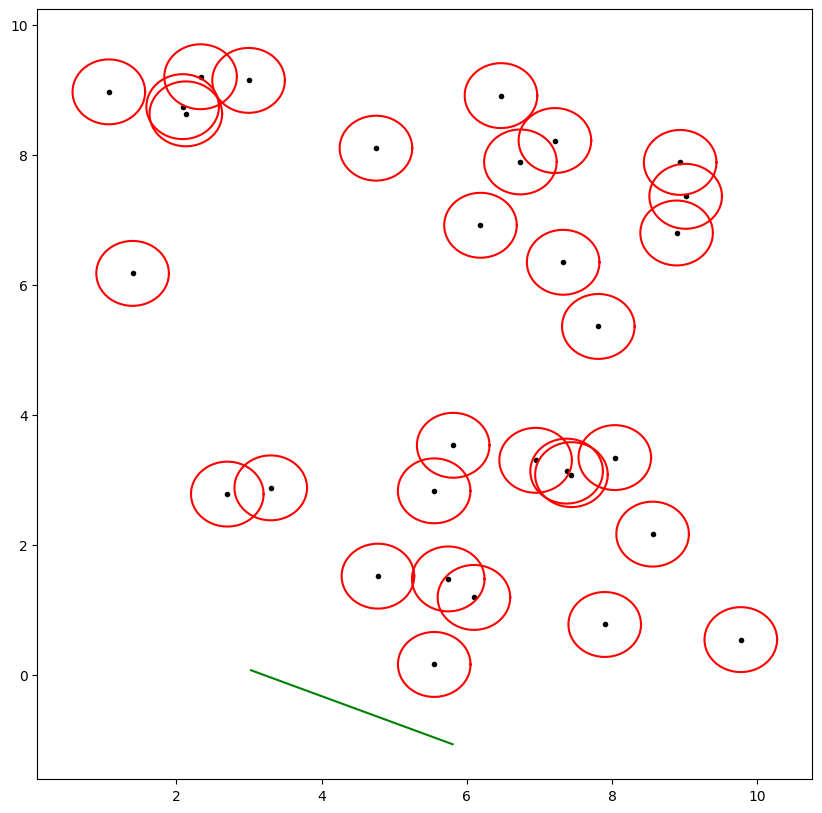

In [18]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Начальные значения
A = 10  # размер зоны
q = 0.3  # lambda для распределения пуассона
cir_r = 0.5  # радиус круга
dist = 3  # расстояние между объектами

def plot_circle(x, y, r):
    angels = np.linspace(0, 2 * np.pi, 50)
    cirX = x + r * np.cos(angels)
    cirY = y + r * np.sin(angels)
    plt.plot(cirX, cirY, "r")

def poisson_points(l, area):
    num_block = np.random.poisson(l * area**2)
    x = np.random.uniform(0, area, size=num_block)
    y = np.random.uniform(0, area, size=num_block)
    return x, y

def create_rect(x1, y1, x2, y2, angl):
    diff_angl = 2 * np.pi - angl
    reverse_angl = np.pi / 2 - diff_angl
    opp_angl = reverse_angl + np.pi
    xA = x1 + cir_r * np.cos(opp_angl)
    yA = y1 + cir_r * np.sin(opp_angl)
    xB = x1 + cir_r * np.cos(reverse_angl)
    yB = y1 + cir_r * np.sin(reverse_angl)
    xC = x2 + cir_r * np.cos(reverse_angl)
    yC = y2 + cir_r * np.sin(reverse_angl)
    xD = x2 + cir_r * np.cos(opp_angl)
    yD = y2 + cir_r * np.sin(opp_angl)
    return xA, yA, xB, yB, xC, yC, xD, yD

def check_dist(a, b, c):
    ca = (c - a) / norm(c - a)
    ba = (b - a) / norm(b - a)
    cb = (c - b) / norm(c - b)
    ab = (a - b) / norm(a - b)

    if np.arccos(np.dot(ca, ba)) > 1:
        return norm(c - a)
    if np.arccos(np.dot(cb, ab)) > 1:
        return norm(c - b)
    return norm(np.cross(a - b, a - c)) / norm(b - a)

def iscrossing(x, y, x1, y1, x2, y2, cir_r):
    for i in range(len(x)):
        distance = np.round(check_dist(np.array([x1, y1]), np.array([x2, y2]), np.array([x[i], y[i]])), 1)
        if distance <= cir_r:
            return True
    return False

# Генерация точек и отрисовка
x, y = poisson_points(q, A)

# Угол линии
angl = np.random.uniform(0, 2 * np.pi)

# Координаты линии
x1, y1 = np.random.uniform(0, A), np.random.uniform(0, A)
x2 = x1 + dist * np.cos(angl)
y2 = y1 + dist * np.sin(angl)

# Отрисовка модели
plt.figure(figsize=(10, 10))
plt.plot(x, y, ".k")
for i in range(len(x)):
    plot_circle(x[i], y[i], cir_r)

plt.plot([x1, x2], [y1, y2], "-g")

# Проверка на пересечение
if iscrossing(x, y, x1, y1, x2, y2, cir_r):
    print("Blocked")
else:
    print("Free")

# Подсчет вероятности перекрытия на основе 1000 экземпляров
cnt = 0
for i in range(1000):
    x, y = poisson_points(q, A)
    angl = np.random.uniform(0, 2 * np.pi)
    x1, y1 = np.random.uniform(0, A), np.random.uniform(0, A)
    x2 = x1 + dist * np.cos(angl)
    y2 = y1 + dist * np.sin(angl)

    if iscrossing(x, y, x1, y1, x2, y2, cir_r):
        cnt += 1
print(cnt / 1000)

# Теоретическая вероятность
S = 2 * cir_r * dist
l = q * S
prob = 1 - np.exp(-l)
print(prob)
